In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

In [5]:
def BLPF(fshift,D0,n):
    rows,cols=fshift.shape
    crow,ccol=rows//2,cols//2
    H=np.zeros((rows,cols))
    for u in range(rows):
        for v in range(cols):
            D=np.sqrt((u-crow)**2+(v-ccol)**2)
            H[u,v]=1/(1+(D/D0)**(2*n))
    fshift1=fshift*H
    return fshift1,H

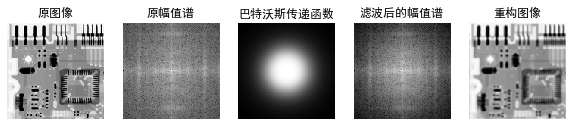

In [8]:
img=cv.imread(r'..\img\achip.tif',0)
f=np.fft.fft2(img)
fshift=np.fft.fftshift(f)
magnitude_spectrum=20*np.log(1+np.abs(fshift))
angle_spectrum=np.abs(np.angle(fshift))
fshift1,H=BLPF(fshift,30,2)
f_ishift=np.fft.ifftshift(fshift1)
img_back=np.fft.ifft2(f_ishift)
img_back=np.abs(img_back)
plt.figure(figsize=(10,5))
plt.subplot(151),plt.imshow(img, cmap = 'gray')  #显示加噪图像
plt.title('原图像'), plt.axis("off")
plt.subplot(152),plt.imshow(magnitude_spectrum, cmap = 'gray')  #显示加噪图像
plt.title('原幅值谱')
plt.axis("off")
plt.subplot(153),plt.imshow(H, cmap = 'gray') 
plt.title('巴特沃斯传递函数'), plt.axis("off")
plt.subplot(154),plt.imshow(20*np.log(1+np.abs(fshift1)), cmap = 'gray')  #显示加噪图像
plt.title('滤波后的幅值谱')
plt.axis("off")
plt.subplot(155),plt.imshow(img_back, cmap = 'gray')  #显示加噪图像
plt.title('重构图像')
plt.axis("off")
plt.show()

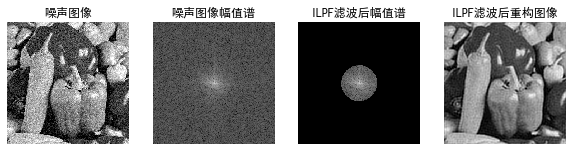

In [11]:
import cv2
import numpy as np
from math import *
import random
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负


def addGaussianNoise(src,means=0,sigma=0.1):
    NoiseImg=src/src.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            #python里使用random.gauss函数加高斯噪声
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(means,sigma)
            if  NoiseImg[i,j]< 0:
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    return NoiseImg

img0 = cv2.imread(r'..\img\peppers.bmp',0)
img=addGaussianNoise(img0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum0 = 20*np.log(1+np.abs(fshift)) 
plt.figure(figsize=(10,5))
plt.subplot(141),plt.imshow(img, cmap = 'gray')  #显示加噪图像
plt.title('噪声图像'), plt.axis("off")
plt.subplot(142),plt.imshow(magnitude_spectrum0, cmap = 'gray')  #显示加噪图像
plt.title('噪声图像幅值谱')
plt.axis("off")
#进行理想低通滤波
r=50      #截止频率的设置
[m,n]=fshift.shape
H=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        d=sqrt((i-m/2)*(i-m/2)+(j-n/2)*(j-n/2))
        if d<r:
            H[i,j]= 1
G=H*fshift
magnitude_spectrum1 =20*np.log(1+np.abs(G))  #理想低通滤波后的幅值谱
f1 = np.fft.ifftshift(G)
img1 = abs(np.fft.ifft2(f1))   #重构图像
plt.subplot(143),plt.imshow(magnitude_spectrum1, cmap = 'gray')  #显示滤波后幅值谱
plt.title('ILPF滤波后幅值谱'), plt.axis("off")
plt.subplot(144),plt.imshow(img1, cmap = 'gray')  #显示重构图像
plt.title('ILPF滤波后重构图像'), plt.axis("off")
plt.show()
